In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

In [5]:
elem_number = 1000

In [6]:
def f(x, y) :
    return abs(x - y)

Генерируем лейблы для графиков и цветогенератор


In [7]:
elems = ['$2 \cdot \overline{X}$','$\overline{X} + \\frac{X_{(n)}}{2}$' ,'$(n + 1) \cdot X_{(1)}$' ,'$X_{(1)} + X_{(n)}$' ,'$\\frac{(n + 1)}{n} \cdot X_{(n)}$']

In [9]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']

In [10]:
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

Посчитаем все оценки по аналогии с задачей 1.1
А также найдем значение квадратичной функции потерь!

In [20]:
def uniform_distribution_generator(theta, elements_number, ylimit = 3) :
    selection = []
    for k in range(100) :
        selection.append(scipy.stats.uniform.rvs(loc = 0, scale = theta, size = elements_number))
    #  print selection
    #evals = np.zeros((elements_number, 5))
    evals = np.zeros((100, elements_number,5))
    means = []
    maxes = []
    mines = []
    for j in range(100) :
        means.append([np.mean(selection[j][:(i + 1)]) for i in xrange(elements_number)])
        maxes.append([np.max(selection[j][:(i + 1)]) for i in xrange(elements_number)])
        mines.append([np.min(selection[j][:(i + 1)]) for i in xrange(elements_number)])
        evals[j][:,0] = map(lambda x: 2 * x, means[j])
        evals[j][:,1] = [means[j][i] +  maxes[j][i] / 2. for i in xrange(elements_number)]
        evals[j][:,2] = [(i + 2) * mines[j][i] for i in xrange(elements_number)]
        evals[j][:,3] = [maxes[j][i] + mines[j][i] for i in xrange(elements_number)]
        evals[j][:,4] = [maxes[j][i] * ((i + 2.) / (i + 1.) ) for i in xrange(elements_number)]
    
    quad_eval = map(lambda x : (x - theta) ** 2, evals)
    quad_mean = []
    for k in range(5) :
        quad_mean.append([np.mean([quad_eval[j][i][k] for j in range(100)]) for i in xrange(1000)])
    
    dots = [i for i in xrange(elements_number)]
    plt.figure(figsize=(15,5))
    for j in range(5):
        plot = plt.plot(dots, [quad_mean[j][i] for i in dots], color = color_generator(), label = elems[j])
        plt.ylim(0,ylimit)
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()




# Построим графики для разных значений параметра

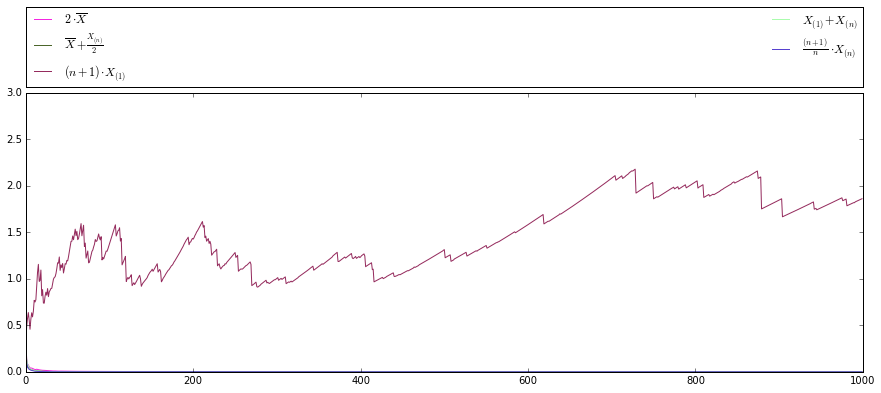

In [21]:
uniform_distribution_generator(1, elem_number)

И снова $(n + 1) \cdot X_{(1)}$  выглядит хуже всех

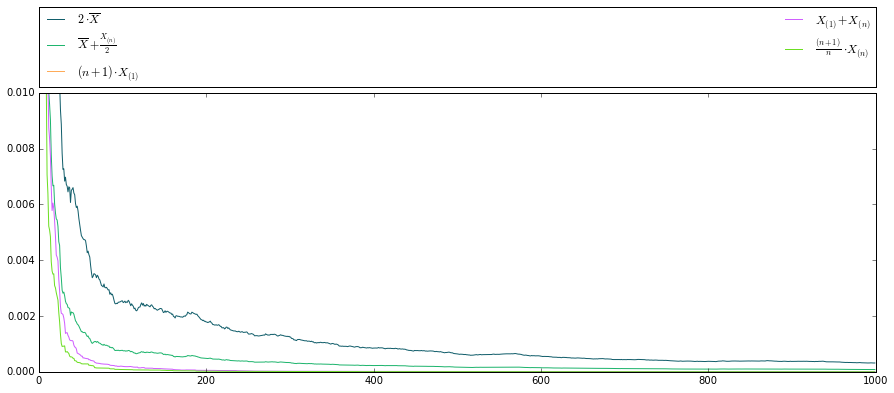

In [14]:
uniform_distribution_generator(1, elem_number, 0.01)

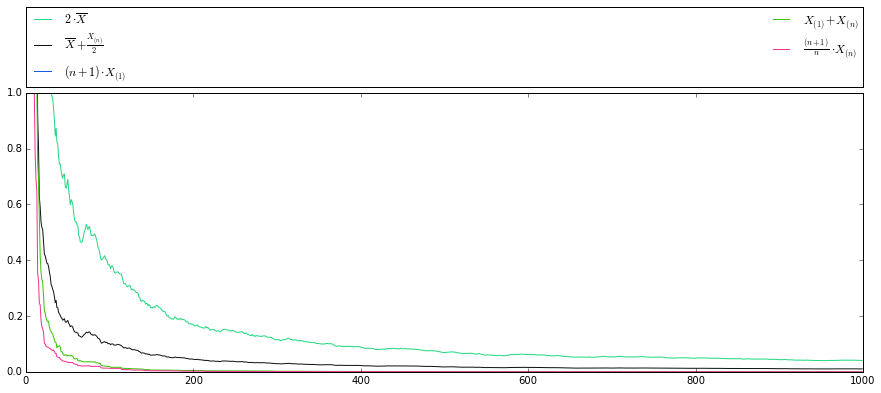

In [15]:
uniform_distribution_generator(10, elem_number, 1)

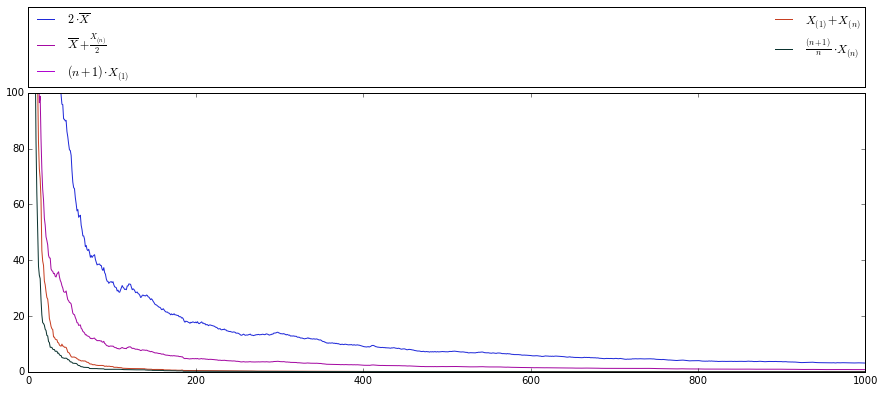

In [16]:
uniform_distribution_generator(100, elem_number, 100)